<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/6%EC%9D%BC%EC%B0%A8/To_be_or_not_to_be.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='orange'> 어느 것을 최소화하여야 하는가? 분산인가 편향인가?
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## **1. 단순 회귀 생성(Simple Linear Regression)**

직선(선형변환식)으로 데이터를 학습(fit, learning)한다.
$$
y = ax + b
$$

$a$ 는 직선의 기울기*(slope)*, $b$는 직선의 절편(*intercept*).
기울기가 2이고 절편이 -5인 직선을 가정하면

In [2]:
from sklearn import linear_model
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = 3 * x + rng.randn(100)*2

In [3]:
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 100)

yfit = model.predict(xfit[:, np.newaxis])

LinearRegression()

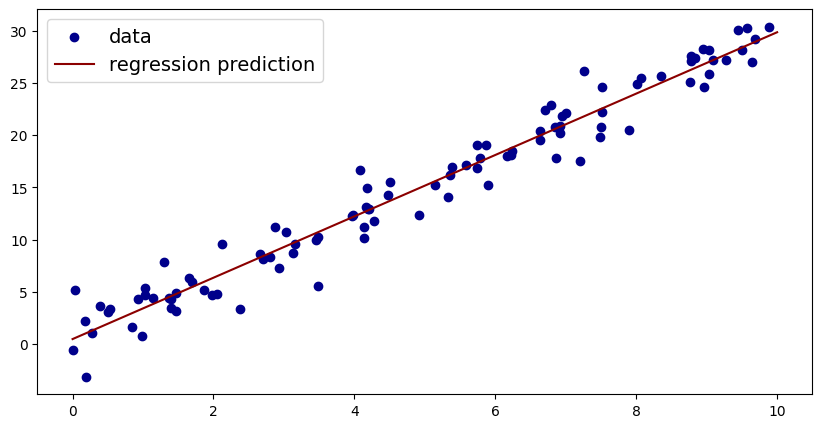

In [4]:
fig = plt.figure(figsize = (10,5))
plt.scatter(x, y, color='darkblue', label='data')
plt.plot(xfit, yfit, color='darkred', label='regression prediction')
plt.legend(fontsize='14')

In [5]:
from sklearn.metrics import mean_squared_error
print(f'Model intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')
print(f'Mean squared error: {mean_squared_error(y, yfit)}')

Model intercept: 0.4739145082978151
Coefficients: [2.93698502]
Mean squared error: 126.40318941029554


## scikit-learn API

In [6]:
from sklearn.linear_model import LinearRegression
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100); print(f'X.shape: {X.shape}')
y = np.cos(X) + 0.25 * rng.randn(100)
X = X.reshape(-1,1); print(f'X.reshape(-1,1): {X.shape}') # X = X[:,np.newaxis]
y_predict = LinearRegression().fit(X,y).predict(X)

X.shape: (100,)
X.reshape(-1,1): (100, 1)


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
Xfit = np.linspace(0, 10, 100)
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
yfit = poly_model.fit(X, y).predict(Xfit[:,np.newaxis])

In [8]:
from sklearn.linear_model import Ridge, Lasso
lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha= 1))
predict_lasso = lasso_model.fit(X, y).predict(Xfit[:,np.newaxis])
ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha= 30))
predict_ridge = ridge_model.fit(X, y).predict(Xfit[:,np.newaxis])

<Figure size 2000x600 with 0 Axes>

(-4.0, 4.0)

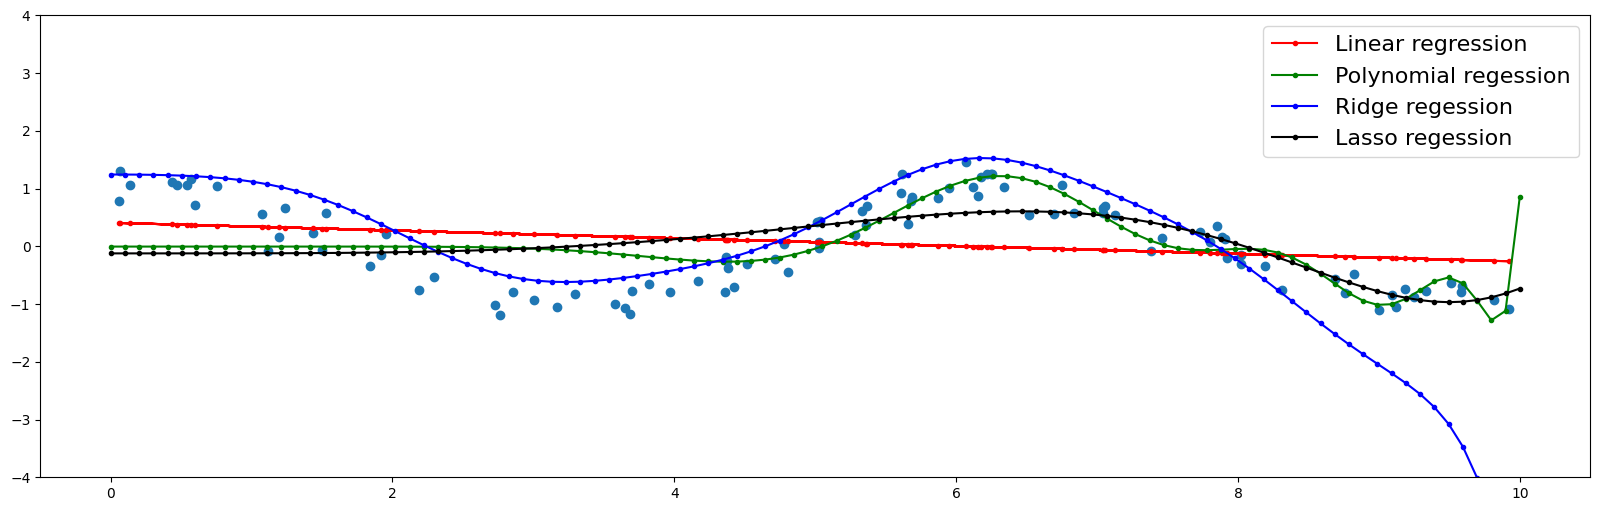

In [9]:
plt.figure(figsize=(20, 6)); plt.rc('legend', fontsize=16)
plt.scatter(X, y)
plt.plot(X, y_predict, 'r.-', label='Linear regression'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='Polynomial regession'); plt.legend()
plt.plot(Xfit, predict_ridge, 'b.-', label='Ridge regession'); plt.legend()
plt.plot(Xfit, predict_lasso, 'k.-', label='Lasso regession'); plt.legend()
plt.ylim(-4, 4)

<img src = 'https://miro.medium.com/max/761/1*nrWncnoJ4V_BkzEf1pd4MA.png'>


<img src='https://miro.medium.com/max/1400/1*zMLv7EHYtjfr94JOBzjqTA.png' width=600>

### Regularization for Sparsity: L₁ Regularization
- https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization

### Regularization for Simplicity: Playground Exercise (L2 Regularization)
- https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/playground-exercise-examining-l2-regularization